#  Training CNN from Scratch with MNIST - Keras with Code Explanation

In this notebook, we train a Convolutional Neural Network to classify images from the MNIST database.

### 1. Load MNIST Database

MNIST is one of the most famous datasets in the field of machine learning.
 - It has 70,000 images of hand-written digits
 - Very straight forward to download
 - Images dimensions are 28x28
 - Grayscale images

In [1]:
from tensorflow.keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### 2. Visualize the First Six Training Images

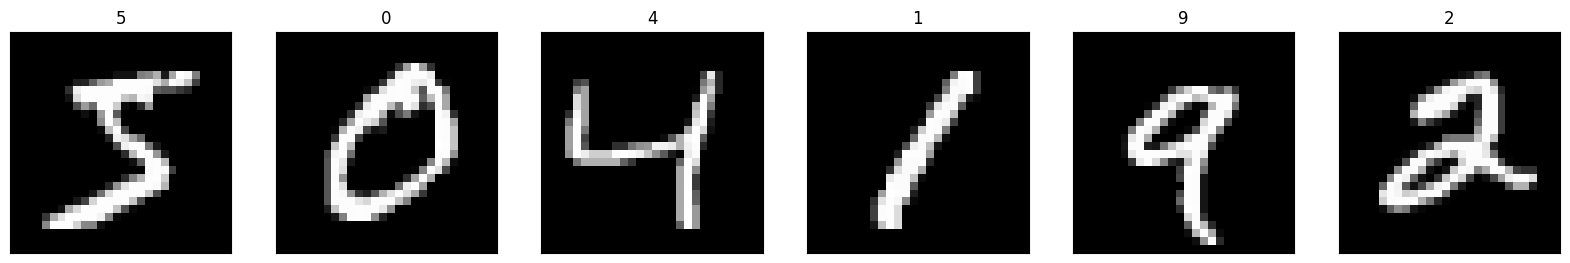

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

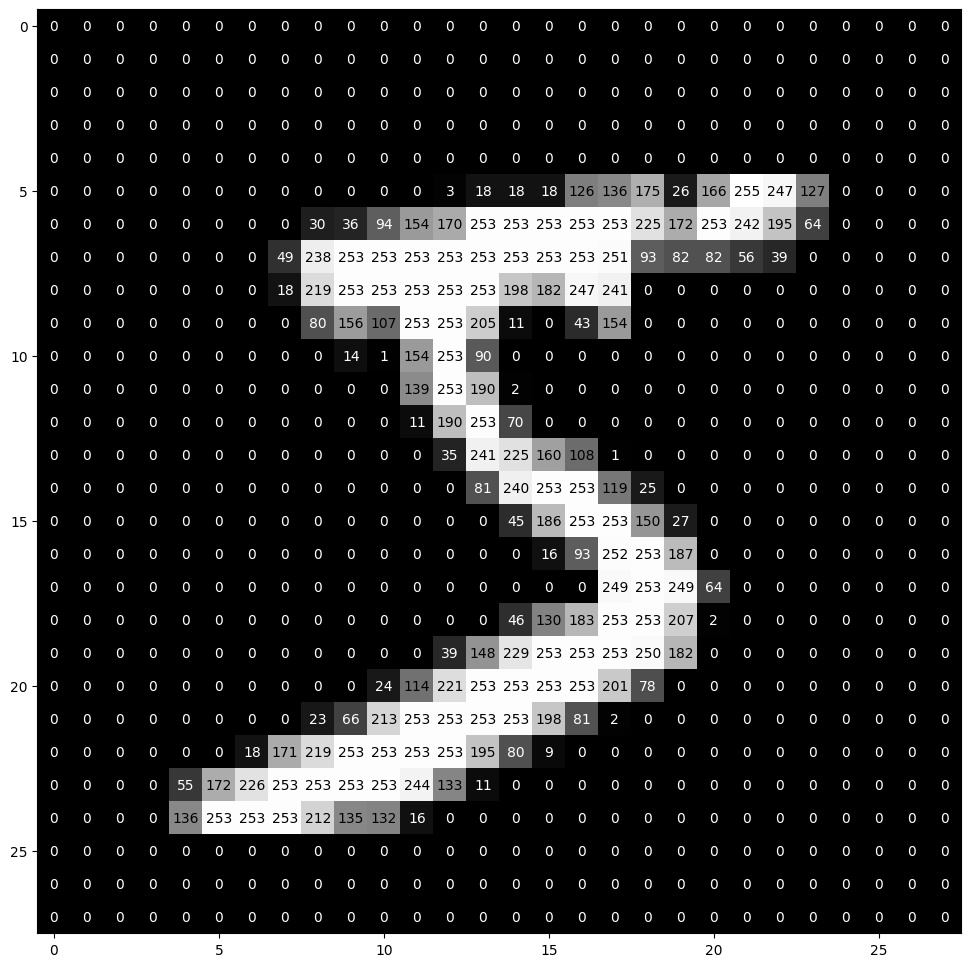

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Preprocess input images: Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# rescale to have values within 0 - 1 range [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### 5. Preprocess the labels: Encode Categorical Integer Labels Using a One-Hot Scheme

In [5]:
import tensorflow

num_classes = 10
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:15])

# Check if y_train is already one-hot encoded
if y_train.ndim == 1:  # If y_train is 1D (not one-hot encoded)
    # one-hot encode the labels
    # convert class vectors to binary class matrices
    y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
    y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
else:
    print("y_train is already one-hot encoded. Skipping to_categorical.")

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Reshape data to fit our CNN (and input_shape)

In [6]:
# input image dimensions 28x28 pixel images.
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

input_shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


### 7. Define the Model Architecture

You must pass the following arguments:
- filters - The number of filters.
- kernel_size - Number specifying both the height and width of the (square) convolution window.

There are some additional, optional arguments that you might like to tune:

- strides - The stride of the convolution. If you don't specify anything, strides is set to 1.
- padding - One of 'valid' or 'same'. If you don't specify anything, padding is set to 'valid'.
- activation - Typically 'relu'. If you don't specify anything, no activation is applied. You are strongly encouraged to add a ReLU activation function to every convolutional layer in your networks.

** Things to remember **
- Always add a ReLU activation function to the **Conv2D** layers in your CNN. With the exception of the final layer in the network, Dense layers should also have a ReLU activation function.
- When constructing a network for classification, the final layer in the network should be a **Dense** layer with a softmax activation function. The number of nodes in the final layer should equal the total number of classes in the dataset.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

# build the model object
model = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(28,28,1)))
# POOL_1: downsample the image to choose the best features
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV_2: here we increase the depth to 64
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
# POOL_2: more downsampling
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten())

# FC_1: fully connected to get all relevant data
model.add(Dense(64, activation='relu'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

### 8. Compile the Model

In [8]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

### 9. Train the Model

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1,
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer],
          verbose=2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.05315, saving model to model.weights.best.keras
938/938 - 10s - 11ms/step - accuracy: 0.9492 - loss: 0.1651 - val_accuracy: 0.9833 - val_loss: 0.0532
Epoch 2/10

Epoch 2: val_loss improved from 0.05315 to 0.03852, saving model to model.weights.best.keras
938/938 - 3s - 3ms/step - accuracy: 0.9857 - loss: 0.0472 - val_accuracy: 0.9867 - val_loss: 0.0385
Epoch 3/10

Epoch 3: val_loss did not improve from 0.03852
938/938 - 3s - 4ms/step - accuracy: 0.9902 - loss: 0.0317 - val_accuracy: 0.9878 - val_loss: 0.0388
Epoch 4/10

Epoch 4: val_loss improved from 0.03852 to 0.02991, saving model to model.weights.best.keras
938/938 - 5s - 5ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9907 - val_loss: 0.0299
Epoch 5/10

Epoch 5: val_loss did not improve from 0.02991
938/938 - 3s - 3ms/step - accuracy: 0.9947 - loss: 0.0174 - val_accuracy: 0.9910 - val_loss: 0.0304
Epoch 6/10

Epoch 6: val_loss improved from 0.02991 to 0.02851, savin

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [10]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.keras')

### 11. Calculate the Classification Accuracy on the Test Set

In [11]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 99.1300%
